<a href="https://colab.research.google.com/github/DharmendraYadav96/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised




##### **Contribution**    - Team
##### **Team Member 1 -** Kratika Jawariya
##### **Team Member 2 -** Dharmendra Yadav
##### **Team Member 3 -** Pranita Tiwari


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# For data manipulation and visualisation
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline

# Text cleaning and preprocessing
import string
string.punctuation        # String library
import re               # Regular expression
import nltk             # Natural language tool-kit
nltk.download('punkt')    # Downloading stopwords
from nltk.corpus import stopwords       #Stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [3]:
path = "/content/mydrive/MyDrive/Almabetter/Capstone/Clustering | Netflix/Netflix.csv"
df = pd.read_csv(path)



### Dataset First View

In [4]:
# Dataset First look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,False,False,False,False,False,False,False,False,False,False,False,False
7783,False,False,False,False,False,False,False,False,False,False,False,False
7784,False,False,False,True,False,True,False,False,False,False,False,False
7785,False,False,False,True,False,False,False,False,False,False,False,False


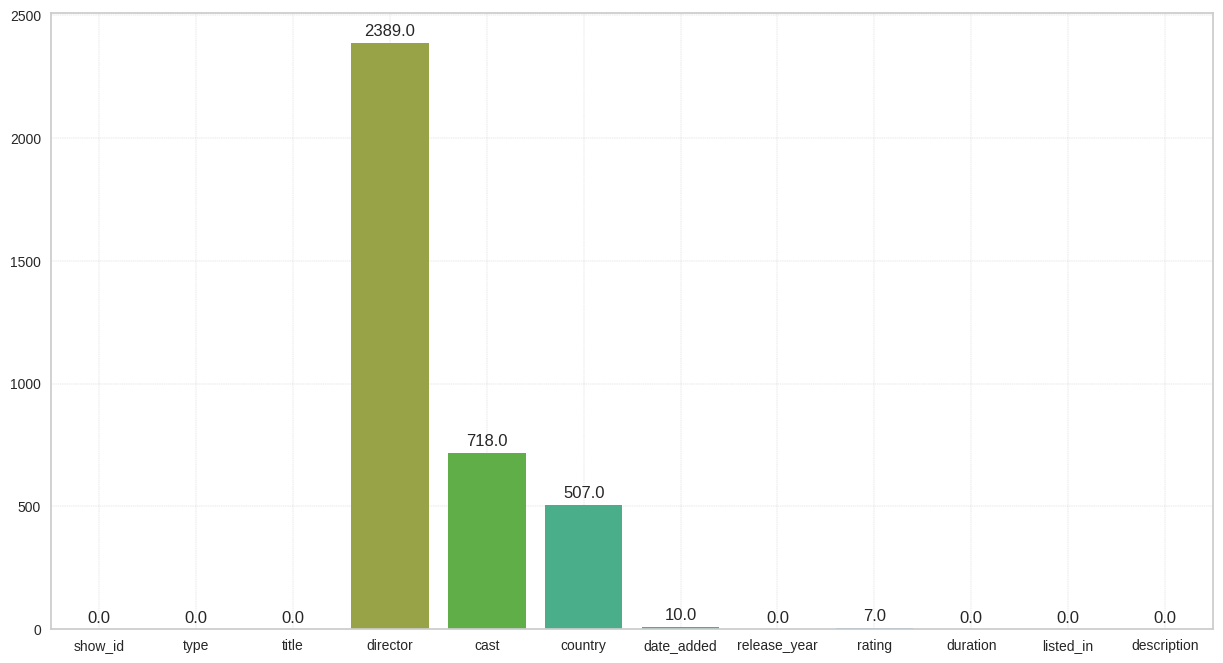

In [9]:
# Visualizing the missing values
plt.figure(figsize=(15,8))
plots= sns.barplot(x=df.columns,y=df.isna().sum())
plt.grid(linestyle='--', linewidth=0.3)

for bar in plots.patches:
    plots.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0,8),
                   textcoords='offset points')
plt.show()

### What did you know about your dataset?

The Netflix Movies and TV Shows Clustering Dataset consists of 12 columns, with only one column having an integer data type. There are no duplicate values in the dataset. However, null values are present in five columns: director, cast, country, date_added, and rating. This dataset is valuable for exploring trends in Netflix content, and it can aid in developing clustering models to group similar titles together. The clustering is based on shared attributes like genre, country of origin, and rating, providing insights into the diverse offerings of movies and TV shows on Netflix.






## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
print(f"Available columns:\n{df.columns.to_list()}")

Available columns:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [11]:
# Dataset Describe
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

**show_id**: Unique identifier for each movie/show.

**type:** Indicates whether the entry is a movie or a TV show.

**title:** Name of the movie or TV show.

**director:** Name of the director(s) of the movie or TV show.

**cast:** Names of the actors and actresses featured in the movie or TV show.

**country:** Country or countries where the movie or TV show was produced.

**date_added:** Date when the movie or TV show was added to Netflix.

**release_year:** Year when the movie or TV show was released.

**rating:** TV rating or movie rating of the movie or TV show.

**duration:** Length of the movie or TV show in minutes or seasons.

**listed_in:** Categories or genres of the movie or TV show.

**description:** Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
print(f"The number of unique values in: ")
print("-"*35)
for i in df.columns:
  print(f"'{i}' : {df[i].nunique()}")

The number of unique values in: 
-----------------------------------
'show_id' : 7787
'type' : 2
'title' : 7787
'director' : 4049
'cast' : 6831
'country' : 681
'date_added' : 1565
'release_year' : 73
'rating' : 14
'duration' : 216
'listed_in' : 492
'description' : 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

1. Handling Null values from each feature

In [13]:
# Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(df.isna().sum())
print("-"*50)

# Let's find out the percentage of null values in each category in order to deal with it.
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = df.isnull().sum()/len(df)
print(f"{null_count_by_variable*100}%")
print("-"*50)

--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64%
--------------------------------------------------


In [14]:
df["date_added"].value_counts()

January 1, 2020      118
November 1, 2019      94
December 31, 2019     76
March 1, 2018         76
October 1, 2018       72
                    ... 
October 12, 2014       1
March 22, 2020         1
March 31, 2013         1
December 12, 2019      1
January 11, 2020       1
Name: date_added, Length: 1565, dtype: int64

In [15]:
df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [16]:
df['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [17]:
## Imputing null value as per our discussion
# imputing with unknown in null values of director and cast feature
df[['director','cast']]=df[['director','cast']].fillna("Unknown")

# Imputing null values of country with Mode
df['country']=df['country'].fillna(df['country'].mode()[0])

# Dropping remaining null values of date_added and rating
df.dropna(axis=0, inplace=True)

In [18]:
# Rechecking the Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(df.isna().sum())
print("-"*50)

# Rechecking the percentage of null values in each category
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = df.isnull().sum()/len(df)
print(f"{null_count_by_variable*100}%")
print("-"*50)

--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64%
--------------------------------------------------


2. Handling nested columns i.e. 'director', 'cast','listed_in', and''country'

In [19]:
# Let's create a copy of dataframe and unnest the original one
df_new= df.copy()

In [20]:
# Unnesting function
# Unnesting 'Directors' column
def unnest(df, col, col_name):
  dir_constraint=df[col].apply(lambda x: str(x).split(', ')).tolist()
  temp_df = pd.DataFrame(dir_constraint, index = df['title'])
  temp_df = temp_df.stack()
  temp_df = pd.DataFrame(temp_df.reset_index())
  temp_df.rename(columns={0:col_name},inplace=True)
  temp_df = temp_df.drop(['level_1'],axis=1)
  return temp_df
  # df1.sample(10)

In [21]:
df1 = unnest(df, 'director', 'Directors')
df1.head(10)

,title,Directors
0,3%,Unknown
1,7:19,Jorge Michel Grau
2,23:59,Gilbert Chan
3,9,Shane Acker
4,21,Robert Luketic
5,46,Serdar Akar
6,122,Yasir Al Yasiri
7,187,Kevin Reynolds
8,706,Shravan Kumar
9,1920,Vikram Bhatt


In [22]:
df2 = unnest(df, 'cast', 'Actors')
df2.head(10)

,title,Actors
0,3%,João Miguel
1,3%,Bianca Comparato
2,3%,Michel Gomes
3,3%,Rodolfo Valente
4,3%,Vaneza Oliveira
5,3%,Rafael Lozano
6,3%,Viviane Porto
7,3%,Mel Fronckowiak
8,3%,Sergio Mamberti
9,3%,Zezé Motta


In [23]:
df3  = unnest(df, 'listed_in', 'Genre')
df3.head(10)

,title,Genre
0,3%,International TV Shows
1,3%,TV Dramas
2,3%,TV Sci-Fi & Fantasy
3,7:19,Dramas
4,7:19,International Movies
5,23:59,Horror Movies
6,23:59,International Movies
7,9,Action & Adventure
8,9,Independent Movies
9,9,Sci-Fi & Fantasy


In [24]:
df4 = unnest(df, 'country', 'Country')
df4.head(10)

,title,Country
0,3%,Brazil
1,7:19,Mexico
2,23:59,Singapore
3,9,United States
4,21,United States
5,46,Turkey
6,122,Egypt
7,187,United States
8,706,India
9,1920,India


In [25]:
# # Unnesting 'Directors' column
# dir_constraint=df['director'].apply(lambda x: str(x).split(', ')).tolist()
# df1 = pd.DataFrame(dir_constraint, index = df['title'])
# df1 = df1.stack()
# df1 = pd.DataFrame(df1.reset_index())
# df1.rename(columns={0:'Directors'},inplace=True)
# df1 = df1.drop(['level_1'],axis=1)
# df1.sample(10)

# # Unnesting 'cast' column
# cast_constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
# df2 = pd.DataFrame(cast_constraint, index = df['title'])
# df2 = df2.stack()
# df2 = pd.DataFrame(df2.reset_index())
# df2.rename(columns={0:'Actors'},inplace=True)
# df2 = df2.drop(['level_1'],axis=1)
# df2.sample(10)

# # Unnesting 'listed_in' column
# listed_constraint=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
# df3 = pd.DataFrame(listed_constraint, index = df['title'])
# df3 = df3.stack()
# df3 = pd.DataFrame(df3.reset_index())
# df3.rename(columns={0:'Genre'},inplace=True)
# df3 = df3.drop(['level_1'],axis=1)
# df3.sample(10)

# # Unnesting 'country' column
# country_constraint=df['country'].apply(lambda x: str(x).split(', ')).tolist()
# df4 = pd.DataFrame(country_constraint, index = df['title'])
# df4 = df4.stack()
# df4 = pd.DataFrame(df4.reset_index())
# df4.rename(columns={0:'Country'},inplace=True)
# df4 = df4.drop(['level_1'],axis=1)
# df4.sample(10)


In [26]:
## Merging all the unnested dataframes
# Merging director and cast
df5 = df2.merge(df1,on=['title'],how='inner')

# Merging listed_in with merged of (director and cast)
df6 = df5.merge(df3,on=['title'],how='inner')

# Merging country with merged of [listed_in with merged of (director and cast)]
df7 = df6.merge(df4,on=['title'],how='inner')

# Head of final merged dataframe
df7.head()

,title,Actors,Directors,Genre,Country
0,3%,João Miguel,Unknown,International TV Shows,Brazil
1,3%,João Miguel,Unknown,TV Dramas,Brazil
2,3%,João Miguel,Unknown,TV Sci-Fi & Fantasy,Brazil
3,3%,Bianca Comparato,Unknown,International TV Shows,Brazil
4,3%,Bianca Comparato,Unknown,TV Dramas,Brazil


Lets merge this dataframe with the original one on the left join to avoid information loss.

In [27]:
# Merging unnested data with the created dataframe in order to make the final dataframe
df = df7.merge(df[['type', 'title', 'date_added', 'release_year', 'rating', 'duration','description']],on=['title'],how='left')
df.head()

,title,Actors,Directors,Genre,Country,type,date_added,release_year,rating,duration,description
0,3%,João Miguel,Unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
1,3%,João Miguel,Unknown,TV Dramas,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
2,3%,João Miguel,Unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
3,3%,Bianca Comparato,Unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
4,3%,Bianca Comparato,Unknown,TV Dramas,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...


**3. Typecasting of attributes**


In [28]:
# Checking info of the dataset before typecasting
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175807 entries, 0 to 175806
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         175807 non-null  object
 1   Actors        175807 non-null  object
 2   Directors     175807 non-null  object
 3   Genre         175807 non-null  object
 4   Country       175807 non-null  object
 5   type          175807 non-null  object
 6   date_added    175807 non-null  object
 7   release_year  175807 non-null  int64 
 8   rating        175807 non-null  object
 9   duration      175807 non-null  object
 10  description   175807 non-null  object
dtypes: int64(1), object(10)
memory usage: 16.1+ MB


In [29]:
# Typecasting duration into integer by removing 'min' and 'season' from the end
df['duration']= df['duration'].apply(lambda x: int(x.split()[0]))

# Typecasting string object to datetime object of date_added column
df['date_added']= pd.to_datetime(df['date_added'])

# Extracting date, day, month and year from date_added column
df["day_added"]= df["date_added"].dt.day
df["month_added"]= df["date_added"].dt.month
df["year_added"]= df["date_added"].dt.year

# Dropping date_added
df.drop('date_added', axis=1, inplace=True)

In [30]:
# Checking info of the dataset after typecasting
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175807 entries, 0 to 175806
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         175807 non-null  object
 1   Actors        175807 non-null  object
 2   Directors     175807 non-null  object
 3   Genre         175807 non-null  object
 4   Country       175807 non-null  object
 5   type          175807 non-null  object
 6   release_year  175807 non-null  int64 
 7   rating        175807 non-null  object
 8   duration      175807 non-null  int64 
 9   description   175807 non-null  object
 10  day_added     175807 non-null  int64 
 11  month_added   175807 non-null  int64 
 12  year_added    175807 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 18.8+ MB


**4. Binning of Rating attribute**


In [31]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()


array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

In [32]:
# Checking head after binning
df.head()

,title,Actors,Directors,Genre,Country,type,release_year,rating,duration,description,day_added,month_added,year_added
0,3%,João Miguel,Unknown,International TV Shows,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
1,3%,João Miguel,Unknown,TV Dramas,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
2,3%,João Miguel,Unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
3,3%,Bianca Comparato,Unknown,International TV Shows,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
4,3%,Bianca Comparato,Unknown,TV Dramas,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020


### What all manipulations have you done and insights you found?

We've organized the data wrangling process into five distinct sections:

**Handling Null Values:**
In this phase, we addressed null values in the following manner:

* Imputed 'Unknown' for 'director' and 'cast'.
* Imputed with the mode for the 'country'.
* Dropped null values in 'date_added' and 'rating' (those with a lower percentage).


**Unnesting Values:**
We performed unnesting on the following features:

* 'director'
* 'cast'
* 'listed_in'
* 'country'

The values were separated into different dataframes and then merged using a left join to isolate each feature's values.
Typecasting:
We adjusted the data types of the following features:

'duration' was converted to an integer (excluding 'min' and 'seasons' from the values).
'date_added' was converted to datetime in the required format.
Feature Extraction:
Additional features were extracted from 'date_added':

'date'
'month'
'year'
Rating Categorization:
Given the varied coded categories in the 'rating' column, we created five bins to distribute values:

Adult: TV-MA, NC-17
Restricted: R, UR
Teen: PG-13, TV-14
All Ages: TV-G, TV-Y, TV-Y7, TV-Y7-FV, PG, G, TV-PG
Not Rated: NR
Data Splitting:
Finally, we divided the dataframe into two separate ones:

'df_movies' containing only Movies.
'df_tvshows' containing only TV Shows.
These steps ensure that the data is well-prepared for further analysis, with features appropriately handled, types casted, and categories simplified for ease of interpretation.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1** What is the relative percentage of total number of Movies and TV Shows over Netflix?


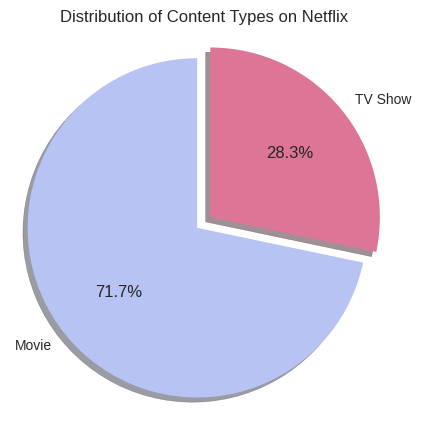

In [33]:
# Chart - 1 visualization code

# Create a DataFrame of the count of each unique value in the 'type' column
type_counts = df['type'].value_counts()
plt.figure(figsize=(5,5))
# Create a pie chart of the 'type' column
plt.pie(type_counts, labels=type_counts.index, colors=['#B7C3F3','#DD7596'],explode=(0, 0.1),shadow=True, autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Content Types on Netflix')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 2**

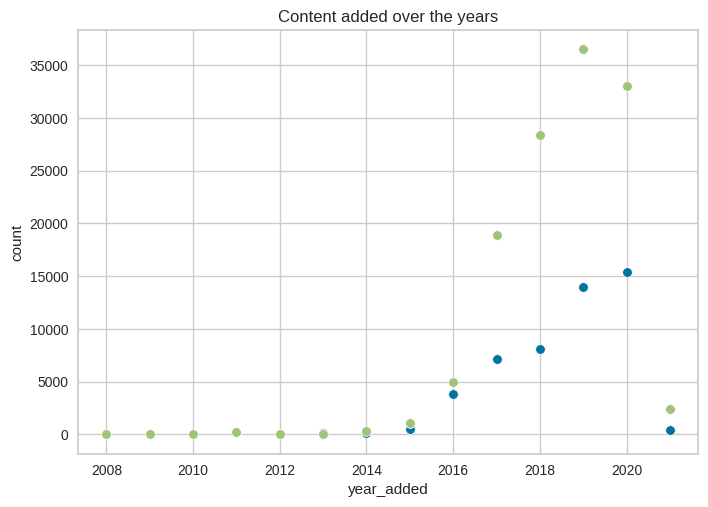

In [34]:
# Chart - 2 visualization code
# Plot growth of the contents over the years.
tv_show = df[df["type"] == "TV Show"]
movie = df[df["type"] == "Movie"]

col = "year_added"

content_1 = tv_show[col].value_counts().reset_index()
content_1 = content_1.rename(columns = {col : "count", "index" : col})
content_1 = content_1.sort_values(col)

content_2 = movie[col].value_counts().reset_index()
content_2 = content_2.rename(columns = {col : "count", "index" : col})
content_2 = content_2.sort_values(col)

trace1 = sns.scatterplot(x=content_1[col], y=content_1["count"])
trace2 = sns.scatterplot(x=content_2[col], y=content_2["count"])
plt.title('Content added over the years')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 3 Directors**

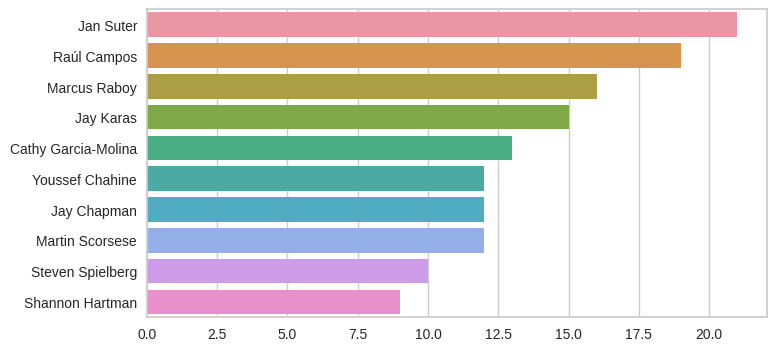

In [35]:
# Chart - 3 visualization code
plt.figure(figsize=(8,4))
df_list = df1[df1['Directors'] !='Unknown']['Directors'].value_counts().nlargest(10).reset_index()   #nlargest used to find top 10 value counts
df_list.columns = ['Directors', 'count']
ax = sns.barplot(y = 'Directors', x = 'count', data = df_list)
ax.set(xlabel=None, ylabel= None)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 4 Country**

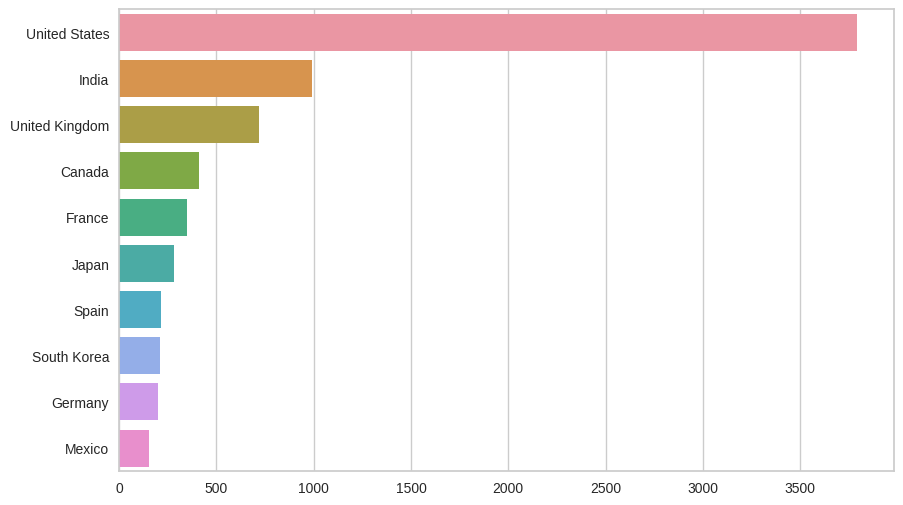

In [36]:
# Chart - 4 visualization code
plt.figure(figsize=(10,6))
df_country_count = df4[df4['Country'] !='Unknown']['Country'].value_counts().nlargest(10).reset_index()
df_country_count.columns = ['Country', 'count']
ax = sns.barplot(y = 'Country', x = 'count', data = df_country_count)
ax.set(xlabel=None, ylabel= None)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 5 Actors**

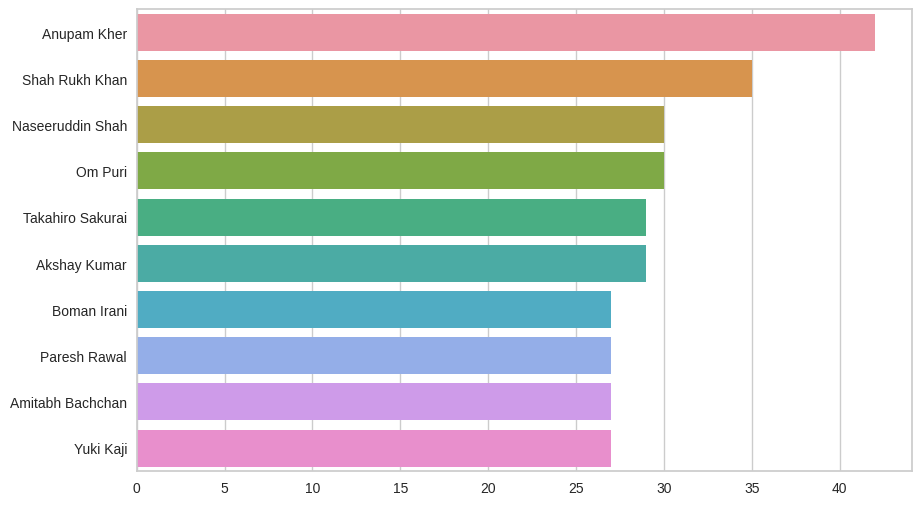

In [37]:
# Chart - 5 visualization code
plt.figure(figsize=(10,6))
df_actor_count = df2[df2['Actors'] !='Unknown']['Actors'].value_counts().nlargest(10).reset_index()
df_actor_count.columns = ['Actors', 'count']
ax = sns.barplot(y = 'Actors', x = 'count', data = df_actor_count)
ax.set(xlabel=None, ylabel= None)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 6 Genre**

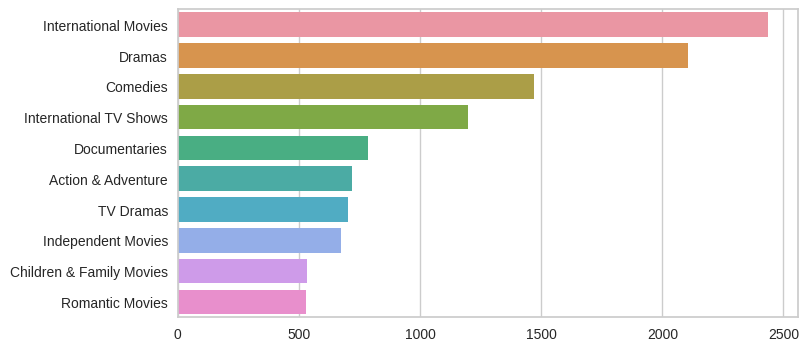

In [38]:
# Chart - 8 visualization code
plt.figure(figsize=(8,4))
df_genre_count = df3[df3['Genre'] !='Unknown']['Genre'].value_counts().nlargest(10).reset_index()
df_genre_count.columns = ['Genre', 'count']
ax = sns.barplot(y = 'Genre', x = 'count', data = df_genre_count)
ax.set(xlabel=None, ylabel= None)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 7 Distributions**

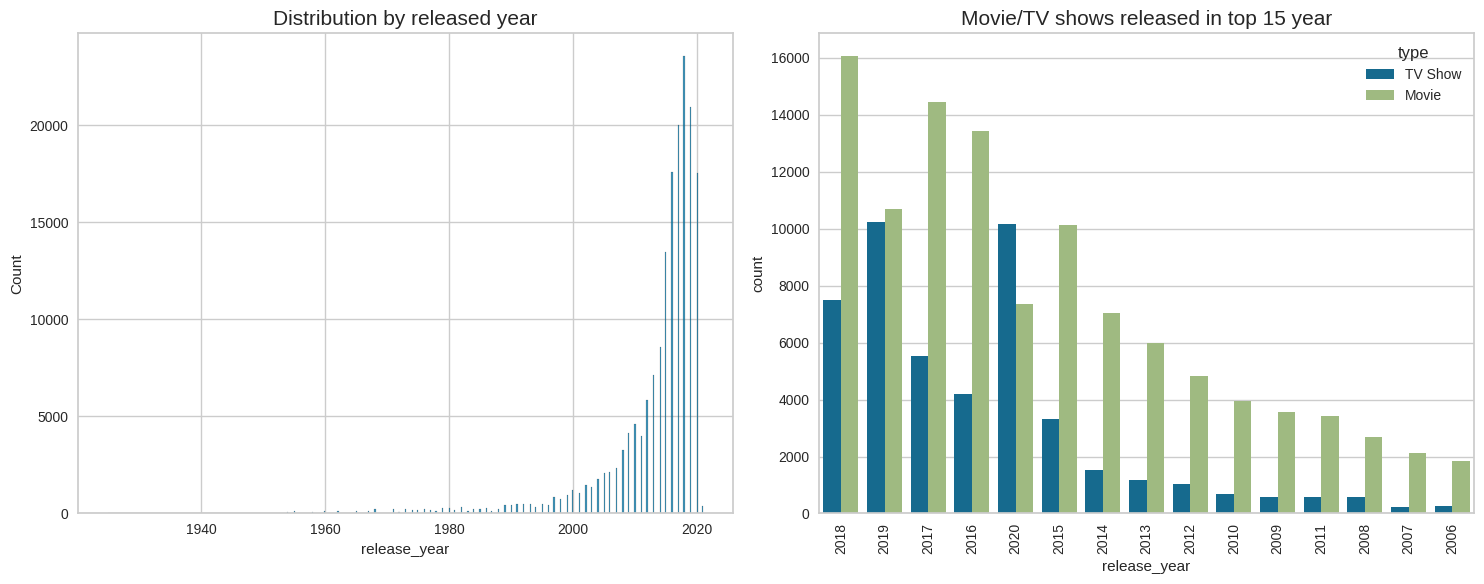

In [39]:
# Chart - 6 visualization code
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.histplot(df['release_year'], ax=ax[0])
hist.set_title('Distribution by released year', size=15)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=df, order=df['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 8 Month added**

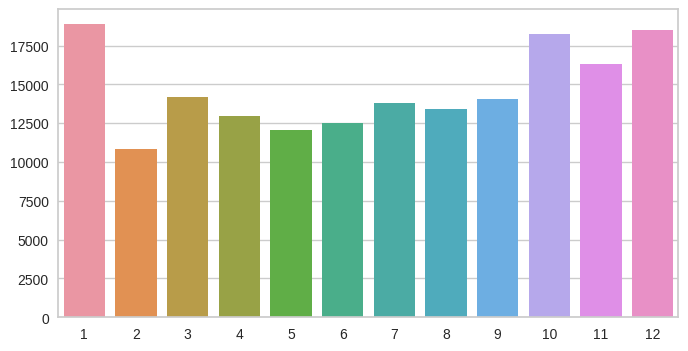

In [40]:
# Chart - Number of shows added on different months
plt.figure(figsize=(8,4))
df_month = df['month_added'].value_counts().nlargest(12).reset_index()
df_month.columns = ['month_added', 'count']
ax = sns.barplot(x = 'month_added', y = 'count', data = df_month)
ax.set(xlabel=None, ylabel= None)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 9 Duration of TV Shows**

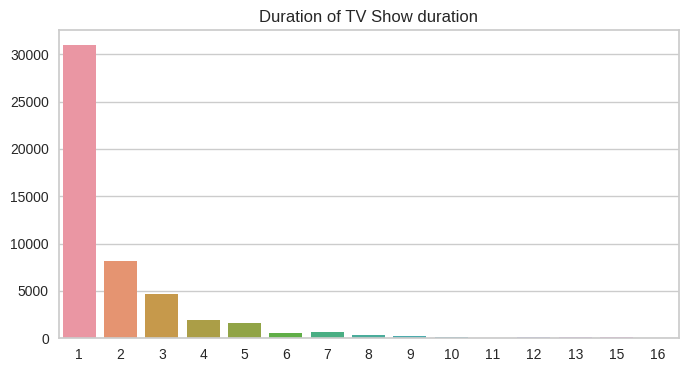

In [41]:
plt.figure(figsize=(8,4))
df_show = tv_show['duration'].value_counts().reset_index()
df_show.columns = ['duration', 'count']
ax = sns.barplot(x = 'duration',  y = 'count', data = df_show)
ax.set(xlabel=None, ylabel= None)
plt.title('Duration of TV Show duration')
plt.show()

In [42]:
# Chart - 9 visualization code
# df[df['type'] == 'TV Show']['duration'].unique()
# tv_show = df[df["type"] == "TV Show"]
# movie = df[df["type"] == "Movie"]

print(tv_show.duration.unique())
print(movie.duration.min())
print(movie.duration.max())

[ 4  1  2  3  5  9  8  6 11  7 13 12 10 16 15]
3
312


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 10 Duration of Movies**

In [43]:
df_movie = pd.DataFrame()
df_movie['duration_binned'] = pd.cut(movie['duration'], bins=[0, 60, 120, 180, 240, 300, 360])
# print(df_movie['duration_binned'].value_counts())
df_movie = df_movie['duration_binned'].value_counts().reset_index()
df_movie.columns = ['duration_binned', 'count']

df_movie

,duration_binned,count
0,"(60, 120]",93162
1,"(120, 180]",28509
2,"(0, 60]",3302
3,"(180, 240]",1070
4,"(240, 300]",21
5,"(300, 360]",15


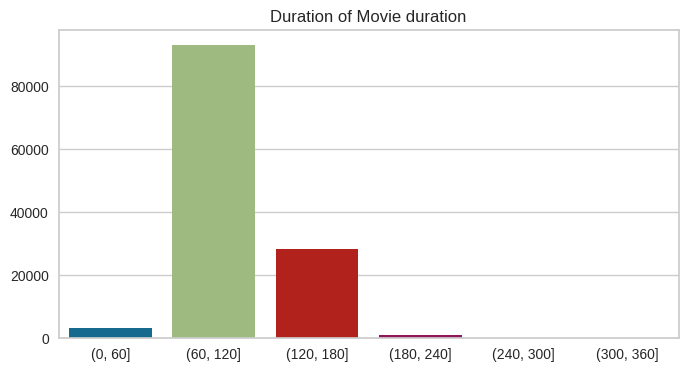

In [44]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x = 'duration_binned',  y = 'count', data = df_movie)
ax.set(xlabel=None, ylabel= None)
plt.title('Duration of Movie duration')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 11 Rating type**

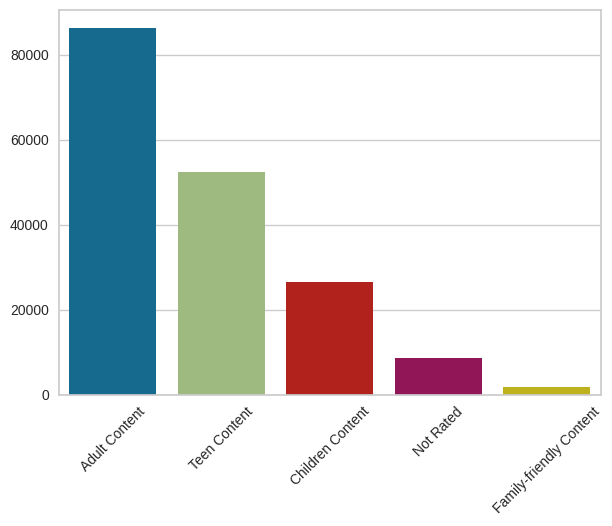

In [45]:
# Chart - 11 visualization code
plt.figure(figsize=(7,5))
df_actor_count = df['rating'].value_counts().reset_index()
df_actor_count.columns = ['rating', 'count']
ax = sns.barplot(x = 'rating', y = 'count', data = df_actor_count)
ax.set_xticklabels(labels = df['rating'].unique(), rotation=45)
ax.set(xlabel=None, ylabel= None)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [46]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [47]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [48]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [49]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [50]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [51]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [52]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [53]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [54]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [55]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [56]:
# Expand Contraction

#### 2. Lower Casing

In [57]:
# Lower Casing

#### 3. Removing Punctuations

In [58]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [59]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [60]:
# Remove Stopwords

In [61]:
# Remove White spaces

#### 6. Rephrase Text

In [62]:
# Rephrase Text

#### 7. Tokenization

In [63]:
# Tokenization

#### 8. Text Normalization

In [64]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [65]:
# POS Taging

#### 10. Text Vectorization

In [66]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [67]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [68]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [69]:
# Transform Your data

### 6. Data Scaling

In [70]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [71]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [72]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [73]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [74]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [77]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [78]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [79]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [80]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [81]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [82]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [83]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***